Practice 2

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_excel('practice_dataframe.xlsx', usecols=['cat5_customerSatisfaction', 'cat1_gender', 'num1_10', 'num2_10', 'num3_10'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
cat1_gender                  982 non-null object
cat5_customerSatisfaction    981 non-null object
num1_10                      1000 non-null float64
num2_10                      952 non-null float64
num3_10                      970 non-null object
dtypes: float64(2), object(3)
memory usage: 27.4+ KB


In [4]:
data.head()

,cat1_gender,cat5_customerSatisfaction,num1_10,num2_10,num3_10
0,male,good,1952.951114,-14.984191,
1,male,Good,248.952820,15.251861,624.089
2,male,Good,465.578792,72.069553,-
3,NaN,Very good,746.798307,-61.282697,702.582
4,male,Very good,-92.649660,11.401243,738.488


Задание №1

<AxesSubplot:ylabel='cat1_gender'>

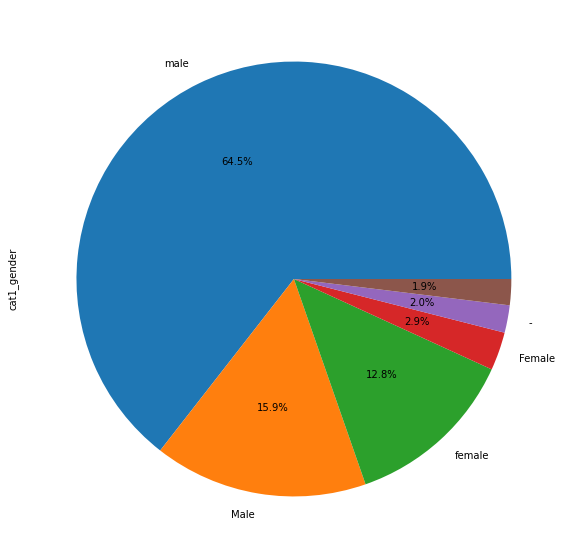

In [5]:
plt.figure(figsize=(10, 10))
data['cat1_gender'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:>

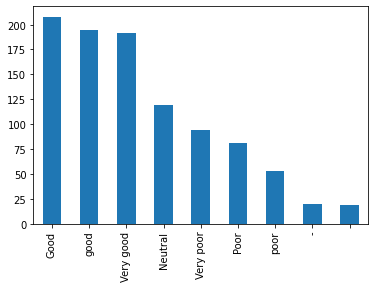

In [6]:
data['cat5_customerSatisfaction'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

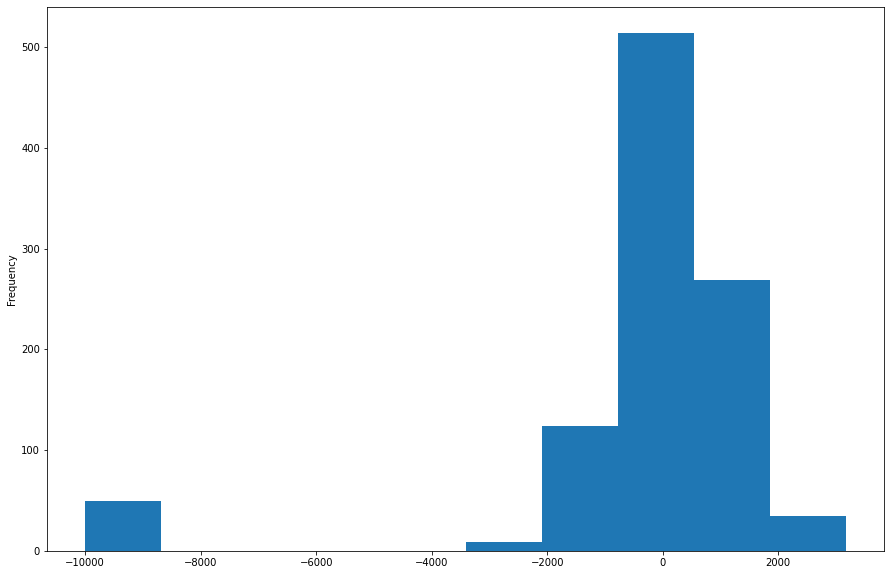

In [7]:
plt.figure(figsize=(15, 10))
data['num1_10'].plot.hist()

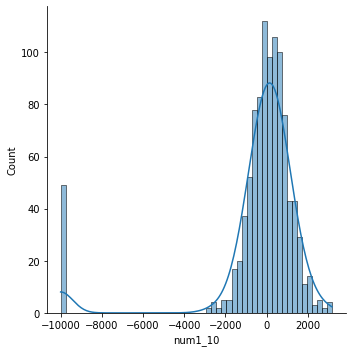

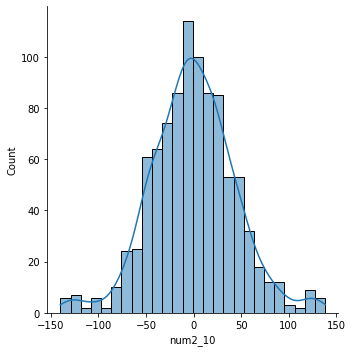

In [8]:
sns.displot(data=data, x='num1_10', kde=True);
sns.displot(data=data, x='num2_10', kde=True);

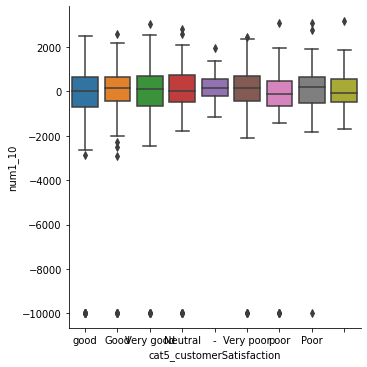

In [9]:
sns.catplot(data=data,
            x='cat5_customerSatisfaction',
            y='num1_10',
            kind='box');

Задание № 2

In [10]:
data['cat1_gender'] = data['cat1_gender'].replace(('-',' '), np.nan).replace('male', 'Male').replace('female', 'Female')

<AxesSubplot:ylabel='cat1_gender'>

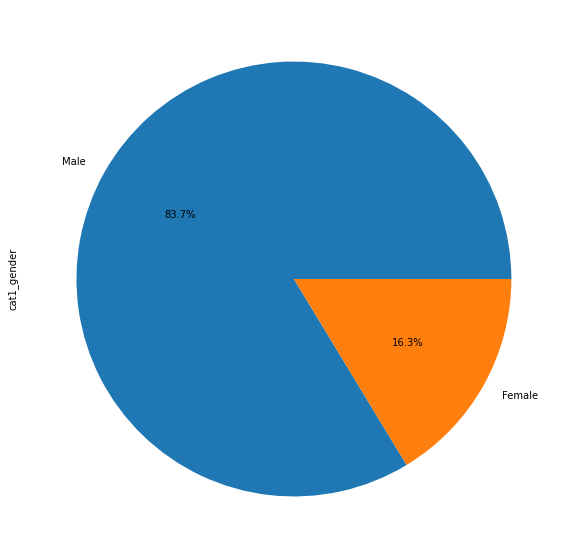

In [11]:
plt.figure(figsize=(10, 10))
data['cat1_gender'].value_counts().plot.pie(autopct='%1.1f%%')

In [12]:
data['cat5_customerSatisfaction'].unique()

array(['good', 'Good', 'Very good', 'Neutral', '-', 'Very poor', 'poor',
       'Poor', ' ', nan], dtype=object)

<AxesSubplot:ylabel='cat5_customerSatisfaction'>

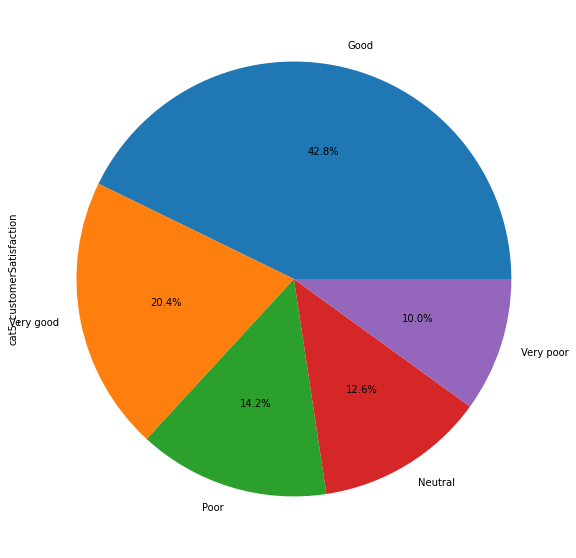

In [13]:
data['cat5_customerSatisfaction'] = data['cat5_customerSatisfaction'].replace('good', 'Good').replace('poor', 'Poor').replace(('-', 'nan', ' '), np.nan)
plt.figure(figsize=(10, 10))
data['cat5_customerSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')

In [14]:
data.num3_10 = data.num3_10.replace(('-', ' '), np.nan)

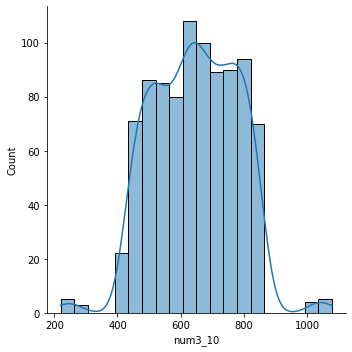

In [15]:
sns.displot(data=data, x='num3_10', kde=True);

Задание №3

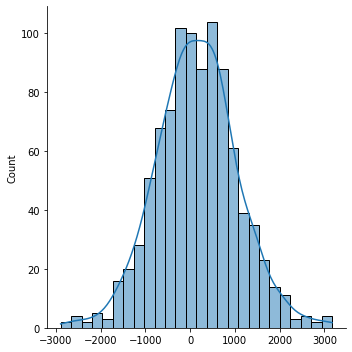

In [16]:
from scipy.stats import sigmaclip

c1, low, upp = sigmaclip(data['num1_10'], 4.0, 4.0)
sns.displot(data=c1, kde=True);
# c2, low1, upp1 = sigmaclip(data['num2_10'], 1.0, 1.0)
# sns.displot(data=c2, kde=True);
# c3, low2, upp2 = sigmaclip(data['num3_10'], 1.0, 1.0)
# sns.displot(data=c3, kde=True);

Задание №4

In [17]:
from sklearn.impute import KNNImputer

# d = KNNImputer()
# d.fit_transform(data['cat5_customerSatisfaction'])

In [18]:
gender_mode = data.cat1_gender.mode()
data.cat1_gender.fillna(gender_mode[0])
data.cat1_gender.isnull().any()

True

In [19]:
print(data.num1_10.isnull().any())
num1_mean = data.num1_10.mean()
data.num1_10 = data.num1_10.fillna(num1_mean)
data.num1_10.isnull().any()

False


False

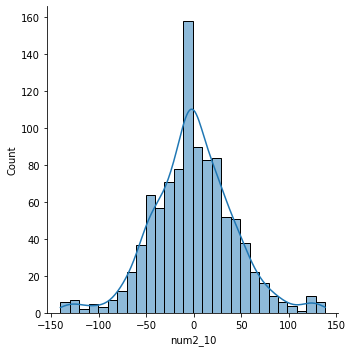

In [20]:
num2_median = data.num2_10.median()
data.num2_10 = data.num2_10.fillna(num2_median)
data.num2_10.isnull().any()
sns.displot(data=data.num2_10, kde=True);

In [38]:
d = KNNImputer(n_neighbors=5)
d.fit_transform([data.num3_10])
data.num3_10.isnull().any()


True

Задание №5

In [28]:
from sklearn import preprocessing
data.num1_10 = preprocessing.normalize([data.num1_10])[0]
# preprocessing.normalize([data.num2_10])
# data.num3_10 = preprocessing.scale(data.num3_10)
print(data.num1_10)

0      0.025865
1      0.003297
2      0.006166
3      0.009891
4     -0.001227
         ...   
995   -0.016410
996   -0.004149
997    0.011904
998   -0.006412
999    0.000607
Name: num1_10, Length: 1000, dtype: float64
